<a href="https://colab.research.google.com/github/Ummee-Habiba/Software-Design-and-Architecture-Lab-Report-4th-semester./blob/main/Real_Time_Stock_Price_Prediction_App_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


Price                     Adj Close     Close      High       Low      Open  \
Ticker                         AAPL      AAPL      AAPL      AAPL      AAPL   
Date                                                                          
2010-01-04 00:00:00+00:00  6.454506  7.643214  7.660714  7.585000  7.622500   
2010-01-05 00:00:00+00:00  6.465664  7.656429  7.699643  7.616071  7.664286   
2010-01-06 00:00:00+00:00  6.362820  7.534643  7.686786  7.526786  7.656429   
2010-01-07 00:00:00+00:00  6.351058  7.520714  7.571429  7.466071  7.562500   
2010-01-08 00:00:00+00:00  6.393281  7.570714  7.571429  7.466429  7.510714   

Price                         Volume  
Ticker                          AAPL  
Date                                  
2010-01-04 00:00:00+00:00  493729600  
2010-01-05 00:00:00+00:00  601904800  
2010-01-06 00:00:00+00:00  552160000  
2010-01-07 00:00:00+00:00  477131200  
2010-01-08 00:00:00+00:00  447610800  


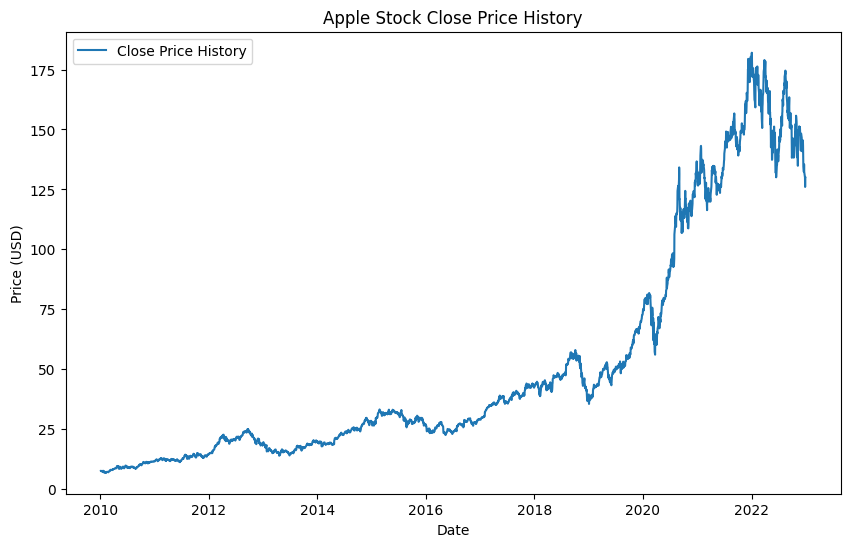

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 0.0088
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 3.8184e-04
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 3.1279e-04
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.4108e-04
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 1.9996e-04
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 1.9565e-04
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 1.6781e-04
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 1.7157e-04
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 1.7072e-04
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 1.4631e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


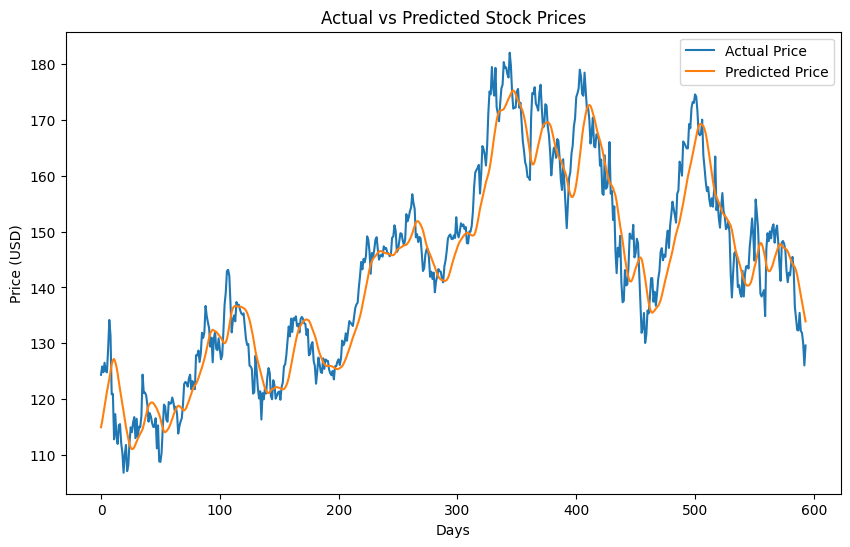

In [10]:
# Install necessary libraries in Google Colab (or your local environment)
!pip install yfinance pandas scikit-learn tensorflow matplotlib
# Import essential libraries for data manipulation, visualization, and machine learning
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
# Download historical stock data using yfinance (e.g., Apple Inc.)
data = yf.download('AAPL', start='2010-01-01', end='2023-01-01')

# Display the first few rows of the data to understand the structure
print(data.head())
# Plot the closing prices to visualize trends in the stock's history
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price History')
plt.title('Apple Stock Close Price History')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()
# Scale the data between 0 and 1 for better performance with the LSTM model
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Split the data into training (80%) and testing (20%) sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]
# Function to create sequences of past 'time_step' days for predicting the next day's price
def create_dataset(data, time_step=60):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

# Create input sequences for both training and testing data
X_train, Y_train = create_dataset(train_data)
X_test, Y_test = create_dataset(test_data)

# Reshape the data to be compatible with LSTM: [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
# Initialize a Sequential model
model = Sequential()

# Add the first LSTM layer with dropout to prevent overfitting
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Drop 20% of neurons

# Add another LSTM layer with dropout
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))

# Add a dense layer with 25 neurons
model.add(Dense(25))

# Add the output layer with 1 neuron (predicting the stock price)
model.add(Dense(1))

# Compile the model using mean squared error as the loss function and Adam optimizer
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the LSTM model on the training data for 10 epochs with a batch size of 64
model.fit(X_train, Y_train, batch_size=64, epochs=10)
# Predict stock prices using the trained model on the test data
predictions = model.predict(X_test)

# Inverse transform the predictions and actual prices back to the original scale
predictions = scaler.inverse_transform(predictions)
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))
# Plot the actual prices and predicted prices to compare the model's performance
plt.figure(figsize=(10, 6))
plt.plot(Y_test, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()
# Save the trained model to a file for future use
model.save('stock_price_model.h5')

